In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

overlapping_data = overlapping_data.drop_duplicates()

overlapping_data.to_csv('/content/drive/MyDrive/overlapping_data_cleaned.csv', index=False)


Finding the most connected person in  the overlapping_data.csv comparing the edge connection between 2 id's in edgescombined.txt

In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data_cleaned.csv')

edgescombined = pd.read_csv('/content/drive/MyDrive/edgescombined1.csv')

connection_counts = edgescombined['user_id'].value_counts().reset_index()
connection_counts.columns = ['user_id', 'connection_count']

most_influential_user = connection_counts.loc[connection_counts['connection_count'].idxmax()]

print("Most Influential User ID:", most_influential_user['user_id'])
print("Number of Connections:", most_influential_user['connection_count'])

connection_counts.to_csv('/content/drive/MyDrive/connection_counts.csv', index=False)


Most Influential User ID: 31415083
Number of Connections: 1010


find the most influential person in each category

In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/combined1.csv')

edgescombined = pd.read_csv('/content/drive/MyDrive/edgescombined1.csv')

grouped_data = overlapping_data.groupby('label')

most_influential_users = {}

for category, group in grouped_data:
    category_users = group['id'].unique()
    category_connections = edgescombined[edgescombined['user_id'].isin(category_users)]

    connection_counts = category_connections['user_id'].value_counts().reset_index()
    connection_counts.columns = ['user_id', 'connection_count']

    most_influential_user = connection_counts.loc[connection_counts['connection_count'].idxmax()]


    most_influential_users[category] = most_influential_user

connection_counts.to_csv('/content/drive/MyDrive/connection_counts5.csv', index=False)

for category, user_data in most_influential_users.items():
    print(f"Category: {category}")
    print("Most Influential User ID:", user_data['user_id'])
    print("Number of Connections:", user_data['connection_count'])
    print()



Category: 5G
Most Influential User ID: 23518497
Number of Connections: 798

Category: other
Most Influential User ID: 31415083
Number of Connections: 1010



In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/combined.csv')

edgescombined = pd.read_csv('/content/drive/MyDrive/edgescombined1.csv')

connection_labels = {}

for index, row in edgescombined.iterrows():
    connection_id = row['connection_id']
    user_id = row['user_id']

    label = overlapping_data.loc[overlapping_data['id'] == connection_id, 'label'].values
    if len(label) > 0:
        connection_labels[connection_id] = {'user_id': user_id, 'label': label[0]}
    else:
        connection_labels[connection_id] = {'user_id': user_id, 'label': "Label not found"}

connection_labels_df = pd.DataFrame(connection_labels).T
connection_labels_df = connection_labels_df.reset_index()
connection_labels_df.columns = ['connection_id', 'user_id', 'label']

connection_labels_df.to_csv('/content/drive/MyDrive/connection_labels.csv', index=False)


Connection of each user in overlapping data id


---



In [ ]:
import pandas as pd
connection_labels=pd.read_csv("/content/drive/MyDrive/connection_labels.csv")
overlapping_data=pd.read_csv("/content/drive/MyDrive/overlapping_data.csv")

edges_grouped = connection_labels.groupby(['user_id', 'label'])['connection_id'].count().reset_index()

edges_pivoted = edges_grouped.pivot(index='user_id', columns='label', values='connection_id').fillna(0)

result_df = overlapping_data.merge(edges_pivoted, left_on='id', right_index=True, how='left').fillna(0)

result_df['Total Connection Count'] = result_df['5G'] + result_df['other'] + result_df['NonConspiracy']

result_df.to_csv("output.csv", index=False)



In [ ]:
import pandas as pd
connection_labels=pd.read_csv("/content/drive/MyDrive/connection_labels.csv")
overlapping_data=pd.read_csv("/content/drive/MyDrive/combined1.csv")

edges_grouped = connection_labels.groupby(['user_id', 'label'])['connection_id'].count().reset_index()

edges_pivoted = edges_grouped.pivot(index='user_id', columns='label', values='connection_id').fillna(0)

result_df = overlapping_data.merge(edges_pivoted, left_on='id', right_index=True, how='left').fillna(0)

result_df['Total Connection Count'] = result_df['5G'] + result_df['other'] + result_df['NonConspiracy']

result_df.to_csv("/content/drive/MyDrive/output2.csv", index=False)



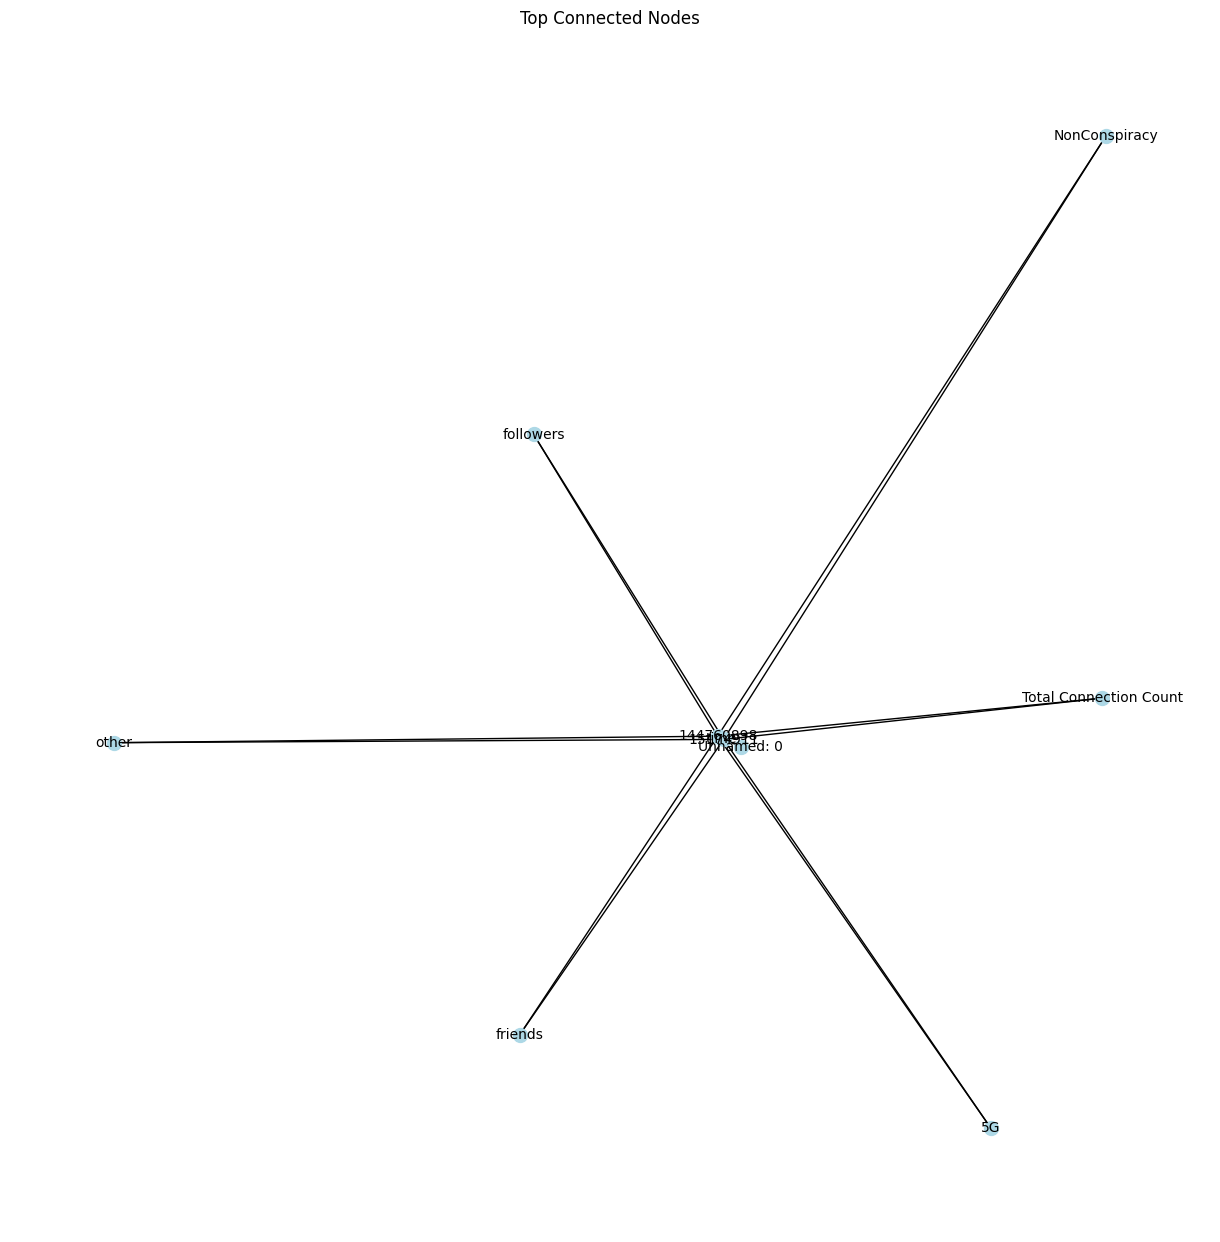

Top Connected User IDs: ['Unnamed: 0', 'friends', 'followers', 'time', 'Total Connection Count', 'other', '5G', 'NonConspiracy', 15174911, 144760898]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for row in result_df.iterrows():
    G.add_node(row[1]['id'])

for _, row in result_df.iterrows():
    for col in result_df.columns:
        if col != 'id' and result_df[col].dtype != 'object':
            value = float(row[col])
            if value > 0:
                G.add_edge(row['id'], col, weight=value)

degree_centrality = nx.degree_centrality(G)

most_influential_person = max(degree_centrality, key=degree_centrality.get)

sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

top_N = 10
top_nodes = sorted_nodes[:top_N]

top_user_ids = [node for node in top_nodes]
subgraph = G.subgraph(top_nodes)

layout = nx.spring_layout(subgraph)

plt.figure(figsize=(12, 12))
nx.draw(subgraph, layout, with_labels=True, node_size=100, node_color='lightblue', font_size=10)

plt.title("Top Connected Nodes")
plt.show()

print("Top Connected User IDs:", top_user_ids)

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/output.csv')

# Replace 'column_name' with the name of the column you want to analyze
column_name = '5G'

# Calculate the minimum and maximum values of the specified column
min_value = df[column_name].min()
max_value = df[column_name].max()

print(f"Minimum value in '{column_name}': {min_value}")
print(f"Maximum value in '{column_name}': {max_value}")

Minimum value in '5G': 0
Maximum value in '5G': 212


In [ ]:
import pandas as pd

# Read the 'output2.csv' file
output2_df = pd.read_csv("/content/drive/MyDrive/output2.csv")

# Sort the DataFrame by the '5G' column in descending order
sorted_df = output2_df.sort_values(by='5G', ascending=False)

# Drop duplicate values in the '5G' column and keep the first occurrence
sorted_df = sorted_df.drop_duplicates(subset='5G', keep='first')

# Get the top 5 values
top_5_5G_values = sorted_df.head(5)

# Display the resulting DataFrame
print(top_5_5G_values)


      Unnamed: 0        id    time  friends  followers  label       cluster  \
349         7332  23518497       0       16         16     5G  more than 15   
2000       47063  10075640   47448       16         16  other  more than 15   
791        18444  58381306  312116       13         15     5G      10 to 15   
535        11077  16045379    4663       18         18     5G  more than 15   
2256       54413  32224445       0       19         19  other  more than 15   

         5G  NonConspiracy  other  Total Connection Count  
349   212.0           40.0  138.0                   390.0  
2000   68.0            2.0   74.0                   144.0  
791    46.0            5.0   17.0                    68.0  
535    43.0           56.0    0.0                    99.0  
2256   39.0           27.0   52.0                   118.0  


NameError: ignored

In [ ]:
# Select the desired columns
selected_columns = ['id', 'friends', 'followers', '5G', 'other', 'Total Connection Count']

# Create a new DataFrame with only the selected columns
selected_df = top_5_5G_values[selected_columns]

# Display the resulting DataFrame
print(selected_df)

selected_df.to_csv("table.csv")


            id  friends  followers     5G  other  Total Connection Count
349   23518497       16         16  212.0  138.0                   390.0
2000  10075640       16         16   68.0   74.0                   144.0
791   58381306       13         15   46.0   17.0                    68.0
535   16045379       18         18   43.0    0.0                    99.0
2256  32224445       19         19   39.0   52.0                   118.0


In [ ]:
top_5_ids = selected_df['id'].tolist()
connections_exist = False
connected_ids=[]

for id1 in top_5_ids:
    for id2 in top_5_ids:
        if id1 != id2:
            row1 = selected_df[selected_df['id'] == id1]
            row2 = selected_df[selected_df['id'] == id2]
            friends1 = row1['friends'].values[0]
            followers1 = row1['followers'].values[0]
            friends2 = row2['friends'].values[0]
            followers2 = row2['followers'].values[0]

            # Check for connections
            if (friends1 > 0 and followers2 > 0) or (friends2 > 0 and followers1 > 0):
                connections_exist = True
                connected_ids.extend([id1, id2])
                break

if connections_exist:
    print("Connections exist among the top 5 IDs.")
    print("Connected IDs:", connected_ids)
else:
    print("No connections exist among the top 5 IDs.")

Connections exist among the top 5 IDs.
Connected IDs: [23518497, 10075640, 10075640, 23518497, 58381306, 23518497, 16045379, 23518497, 32224445, 23518497]


In [ ]:
import csv

# Read the CSV file and extract connections
file_connected_ids = set()

with open("/content/drive/MyDrive/connection_labels.csv", mode="r", newline="") as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        id1, id2 = row["connection_id"], row["user_id"]
        file_connected_ids.add((id1, id2))

# Check if there are connections between top 5 IDs in the file
connections_in_file = False

for id1 in connected_ids:
    for id2 in connected_ids:
        if id1 != id2 and ((id1, id2) in file_connected_ids or (id2, id1) in file_connected_ids):
            connections_in_file = True
            break

if connections_in_file:
    print("Connections exist between the top 5 IDs in the CSV file.")
else:
    print("No connections exist between the top 5 IDs in the CSV file.")


No connections exist between the top 5 IDs in the CSV file.


In [ ]:
import plotly.graph_objects as go

# Define the source and target columns for the Sankey diagram
source = ['Source'] * len(top_5_5G_values)
target = top_5_5G_values['id']

# Create a Sankey diagram trace
sankey_trace = go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=['Source'] + top_5_5G_values['id'].tolist(),
    ),
    link=dict(
        source=source,
        target=target,
        value=top_5_5G_values['5G'].tolist(),
    )
)

# Create a layout for the Sankey diagram
layout = go.Layout(
    title="Top 5 5G Values Sankey Diagram",
    font=dict(size=10),
)

# Create a figure and show the Sankey diagram
fig = go.Figure(data=[sankey_trace], layout=layout)
fig.show()


In [ ]:
import plotly.graph_objects as go

# Define the source, target, and value for the Sankey diagram
source = [0, 1, 2, 3, 3, 4, 5, 5]
target = [3, 4, 5, 4, 5, 6, 6, 7]
value = [8, 4, 8, 2, 8, 4, 4, 2]

# Create a Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Node 0", "Node 1", "Node 2", "Node 3", "Node 4", "Node 5", "Node 6", "Node 7"]
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

# Set the layout of the Sankey diagram
fig.update_layout(title_text="Sankey Diagram Example", font_size=10)
fig.show()
